In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

In [2]:
df = pd.read_csv("vgsales_clean.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16543,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16544,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16545,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16546,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16548 entries, 0 to 16547
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16548 non-null  int64  
 1   Name          16548 non-null  object 
 2   Platform      16548 non-null  object 
 3   Year          16548 non-null  float64
 4   Genre         16548 non-null  object 
 5   Publisher     16548 non-null  object 
 6   NA_Sales      16548 non-null  float64
 7   EU_Sales      16548 non-null  float64
 8   JP_Sales      16548 non-null  float64
 9   Other_Sales   16548 non-null  float64
 10  Global_Sales  16548 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16548.000000,16548.000000,16548.000000,16548.000000,16548.000000,16548.000000,16548.000000
mean,8288.088772,2006.377447,0.265395,0.147022,0.077899,0.048191,0.538782
std,4790.049046,5.905894,0.817791,0.506061,0.309735,0.188858,1.557164
min,1.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4139.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8283.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12431.250000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
print(df.shape[0])
df['Publisher'] = df['Publisher'].astype('str')

for i in df.columns:
  print("{0:14s} unique value = {1}".format(i, len(np.unique(df[i]))))

16548
Rank           unique value = 16548
Name           unique value = 11458
Platform       unique value = 31
Year           unique value = 43
Genre          unique value = 12
Publisher      unique value = 590
NA_Sales       unique value = 409
EU_Sales       unique value = 305
JP_Sales       unique value = 244
Other_Sales    unique value = 157
Global_Sales   unique value = 623


# visualization - numerical data

<function matplotlib.pyplot.show>

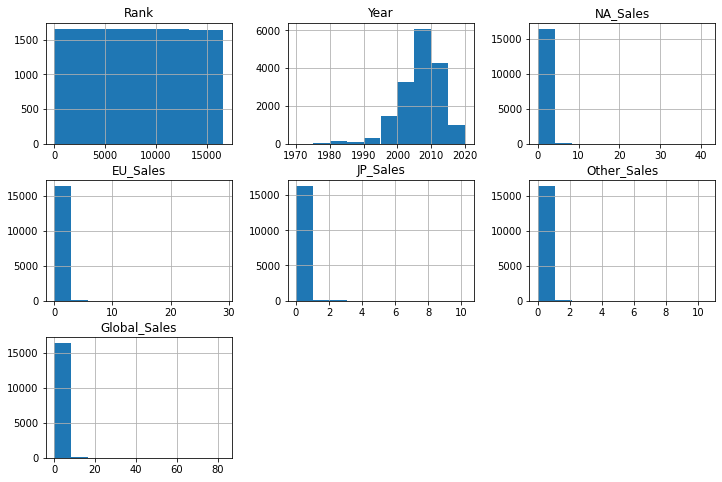

In [50]:
df.hist(figsize=(12, 8))
plt.show

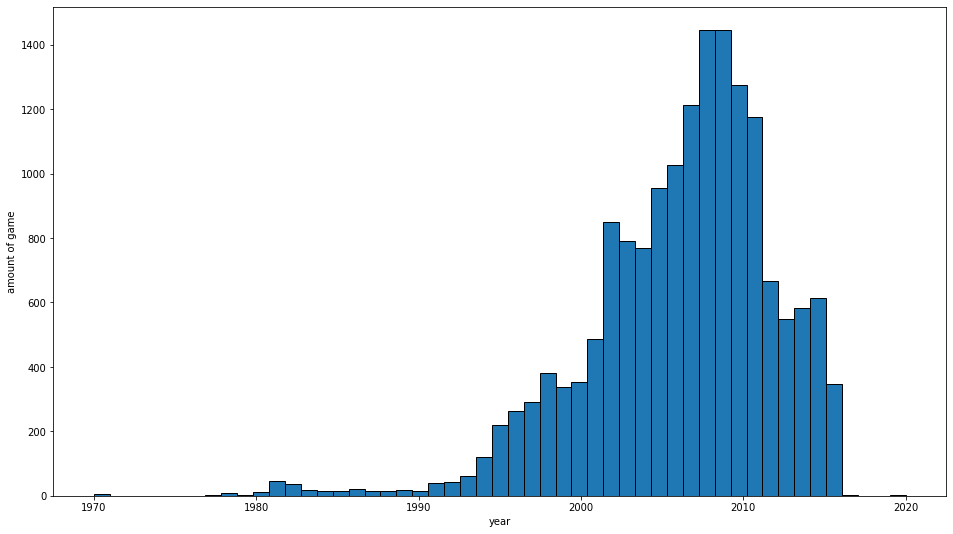

In [18]:
plt.figure(figsize=(16, 9))
plt.hist(df['Year'], bins=51, edgecolor='black')
plt.xlabel('year')
plt.ylabel('amount of game')
plt.show()

In [27]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

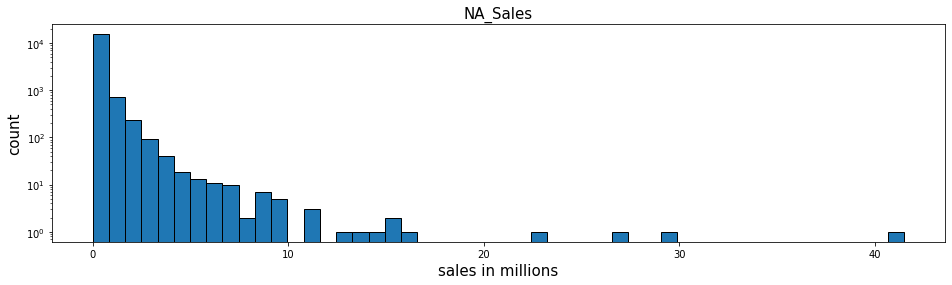

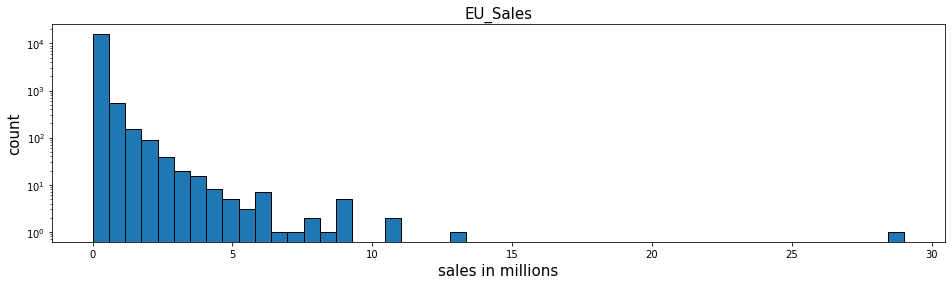

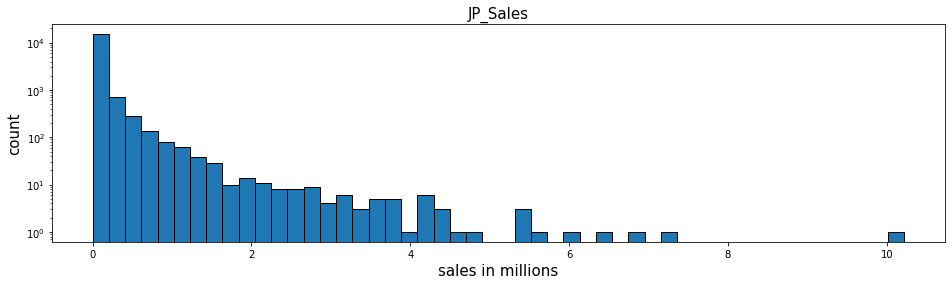

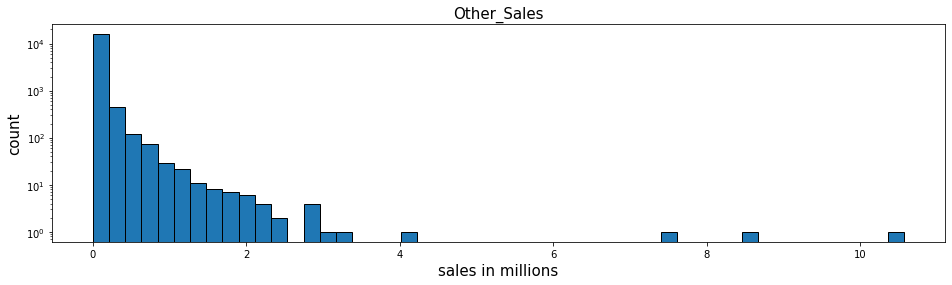

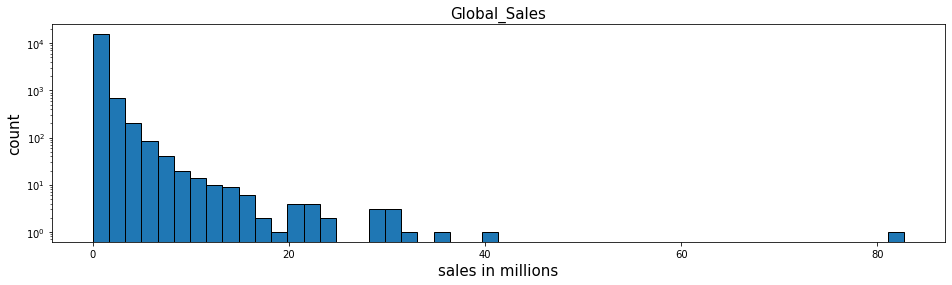

In [42]:
sales_list = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

for i in sales_list:
  plt.figure(figsize=(16, 4))
  plt.hist(df[i], bins=50, edgecolor='black', log=True)
  plt.xlabel('sales in millions', fontdict={'fontsize':15})
  plt.ylabel('count', fontdict={'fontsize':15})
  plt.title(i, fontdict={'fontsize':15})
  plt.show()

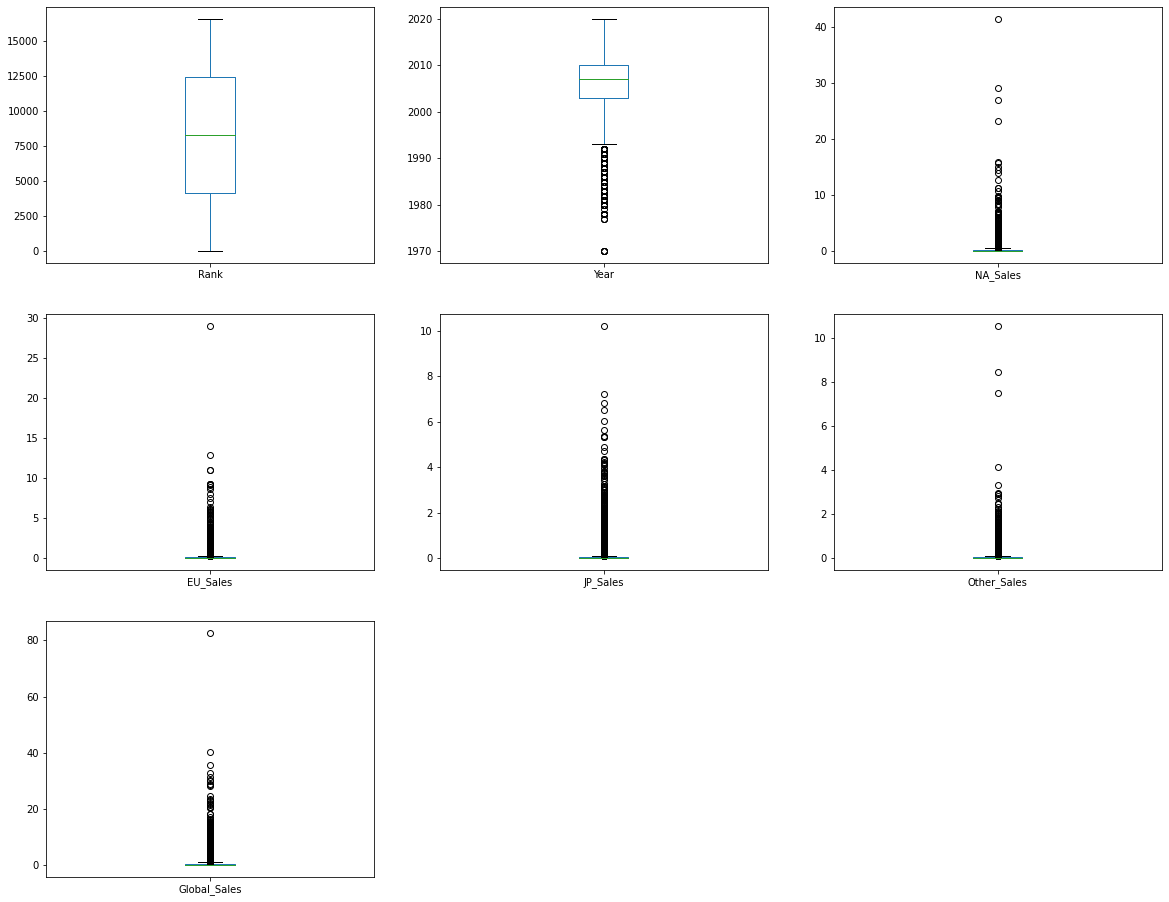

In [37]:
df.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, legend=True, fontsize=10, figsize=(20, 16))
plt.show()

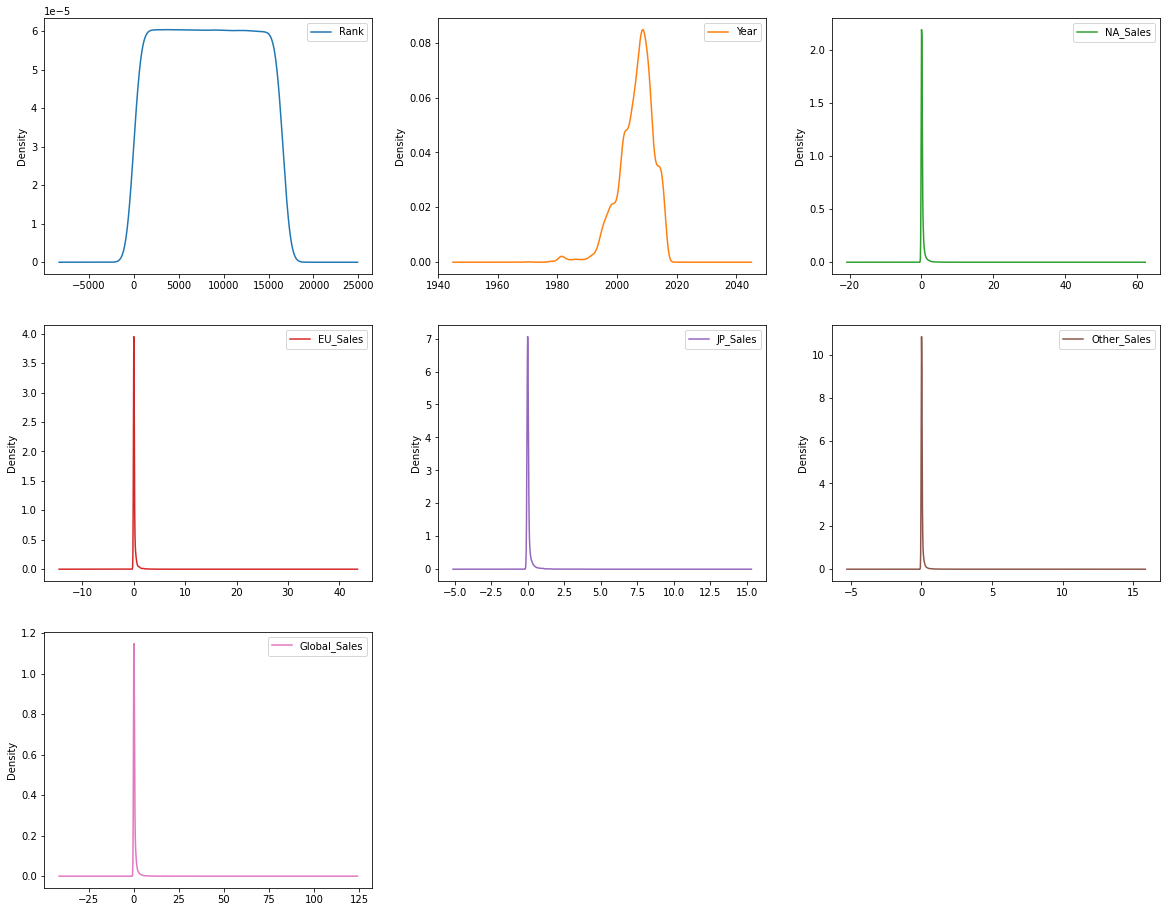

In [53]:
df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, legend=True, fontsize=10, figsize=(20, 16))
plt.show()

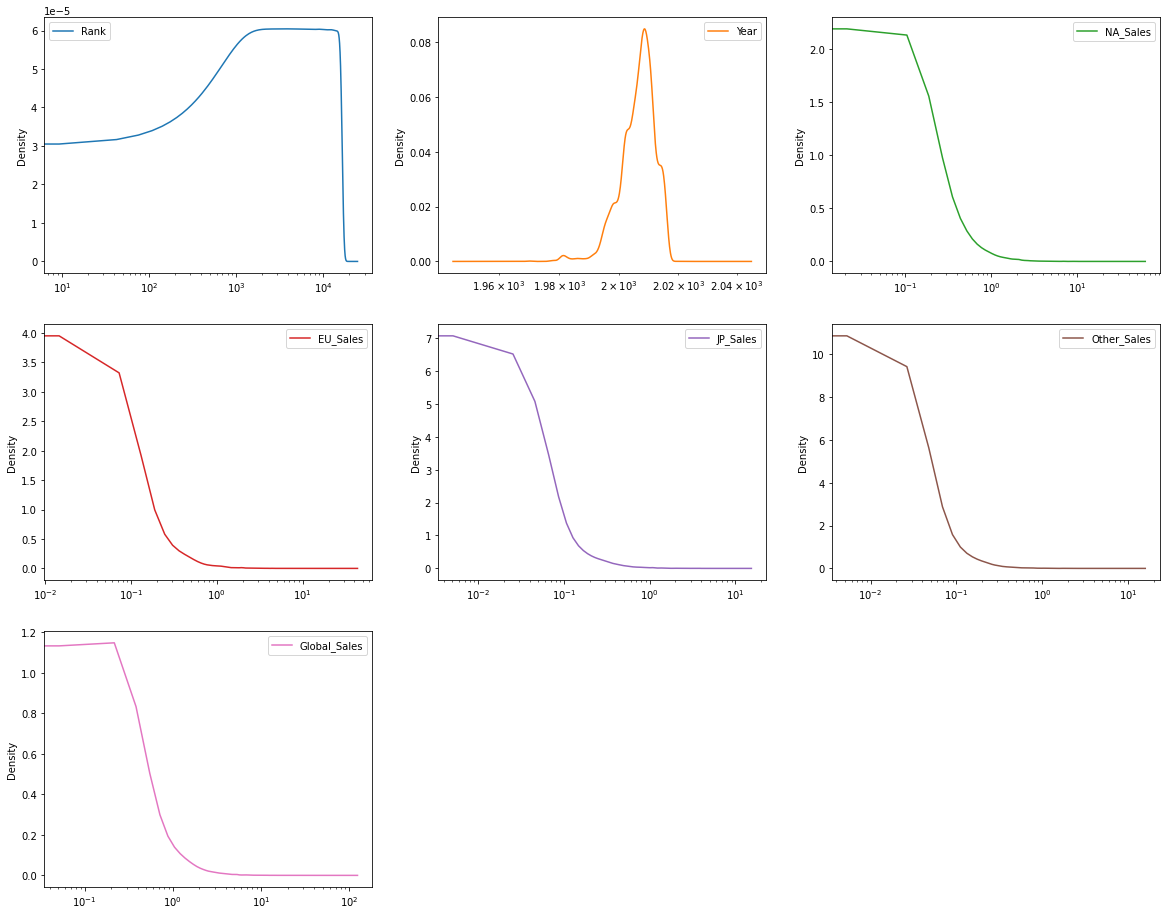

In [52]:
df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, legend=True, fontsize=10, figsize=(20, 16), logx=True)
plt.show()

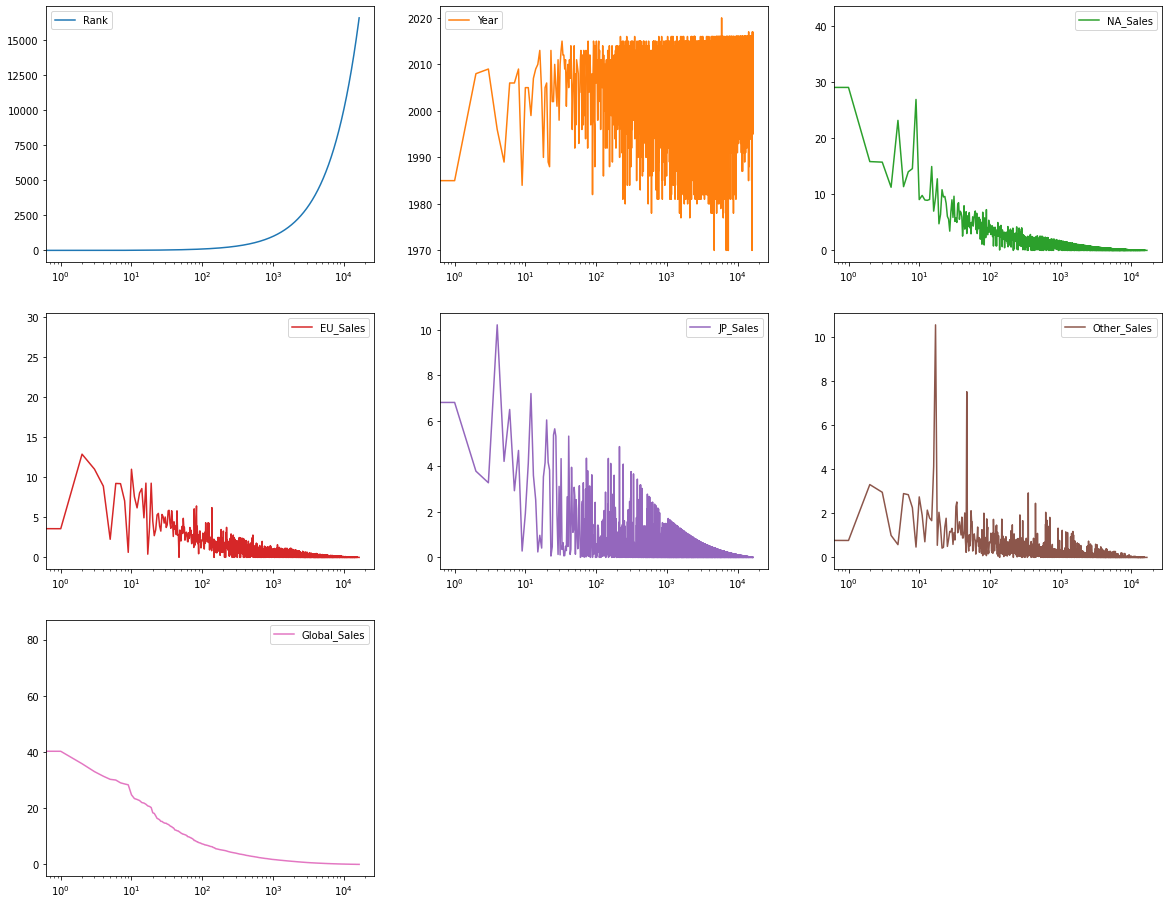

In [54]:

df.plot(kind='line', subplots=True, layout=(3, 3), sharex=False, legend=True, fontsize=10, figsize=(20, 16), logx=True)
plt.show()

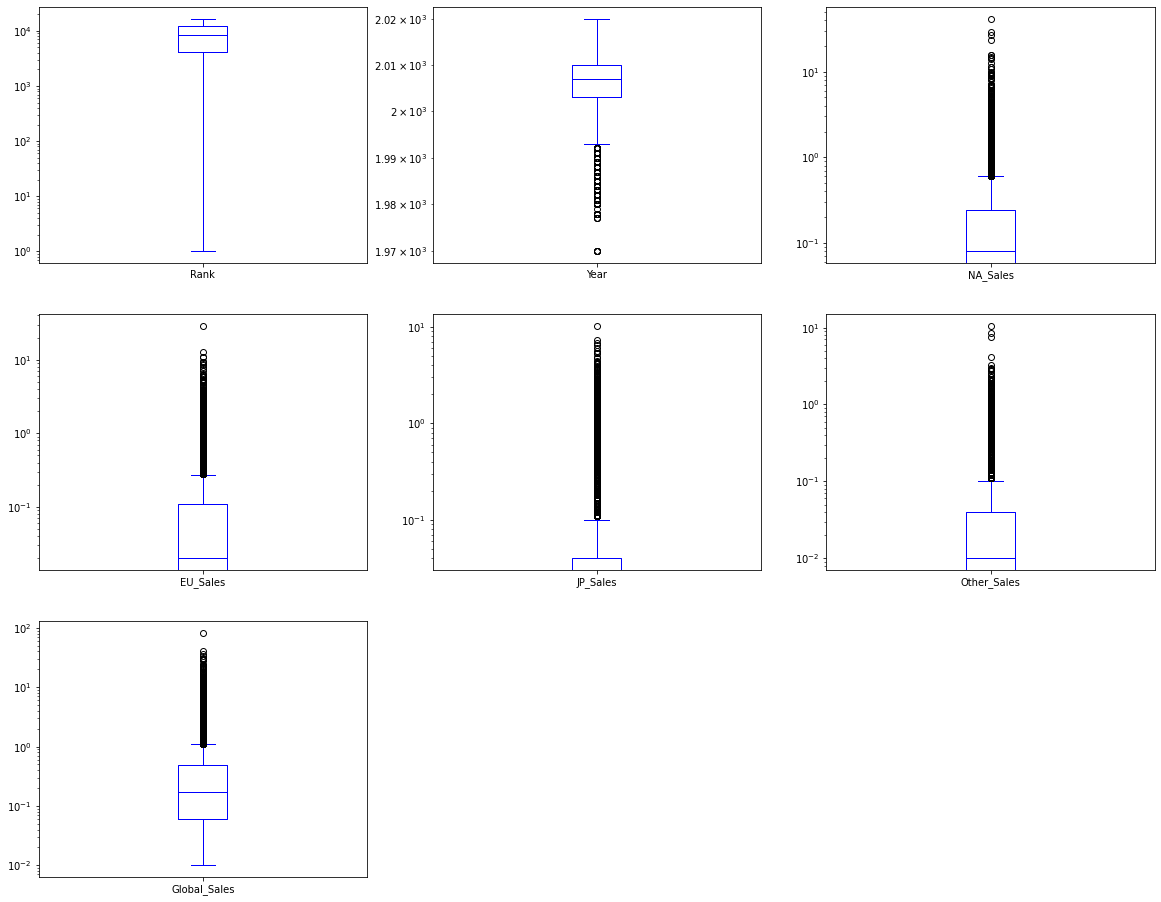

In [56]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, color = 'blue', figsize=(20,16), logy=True)

plt.show()

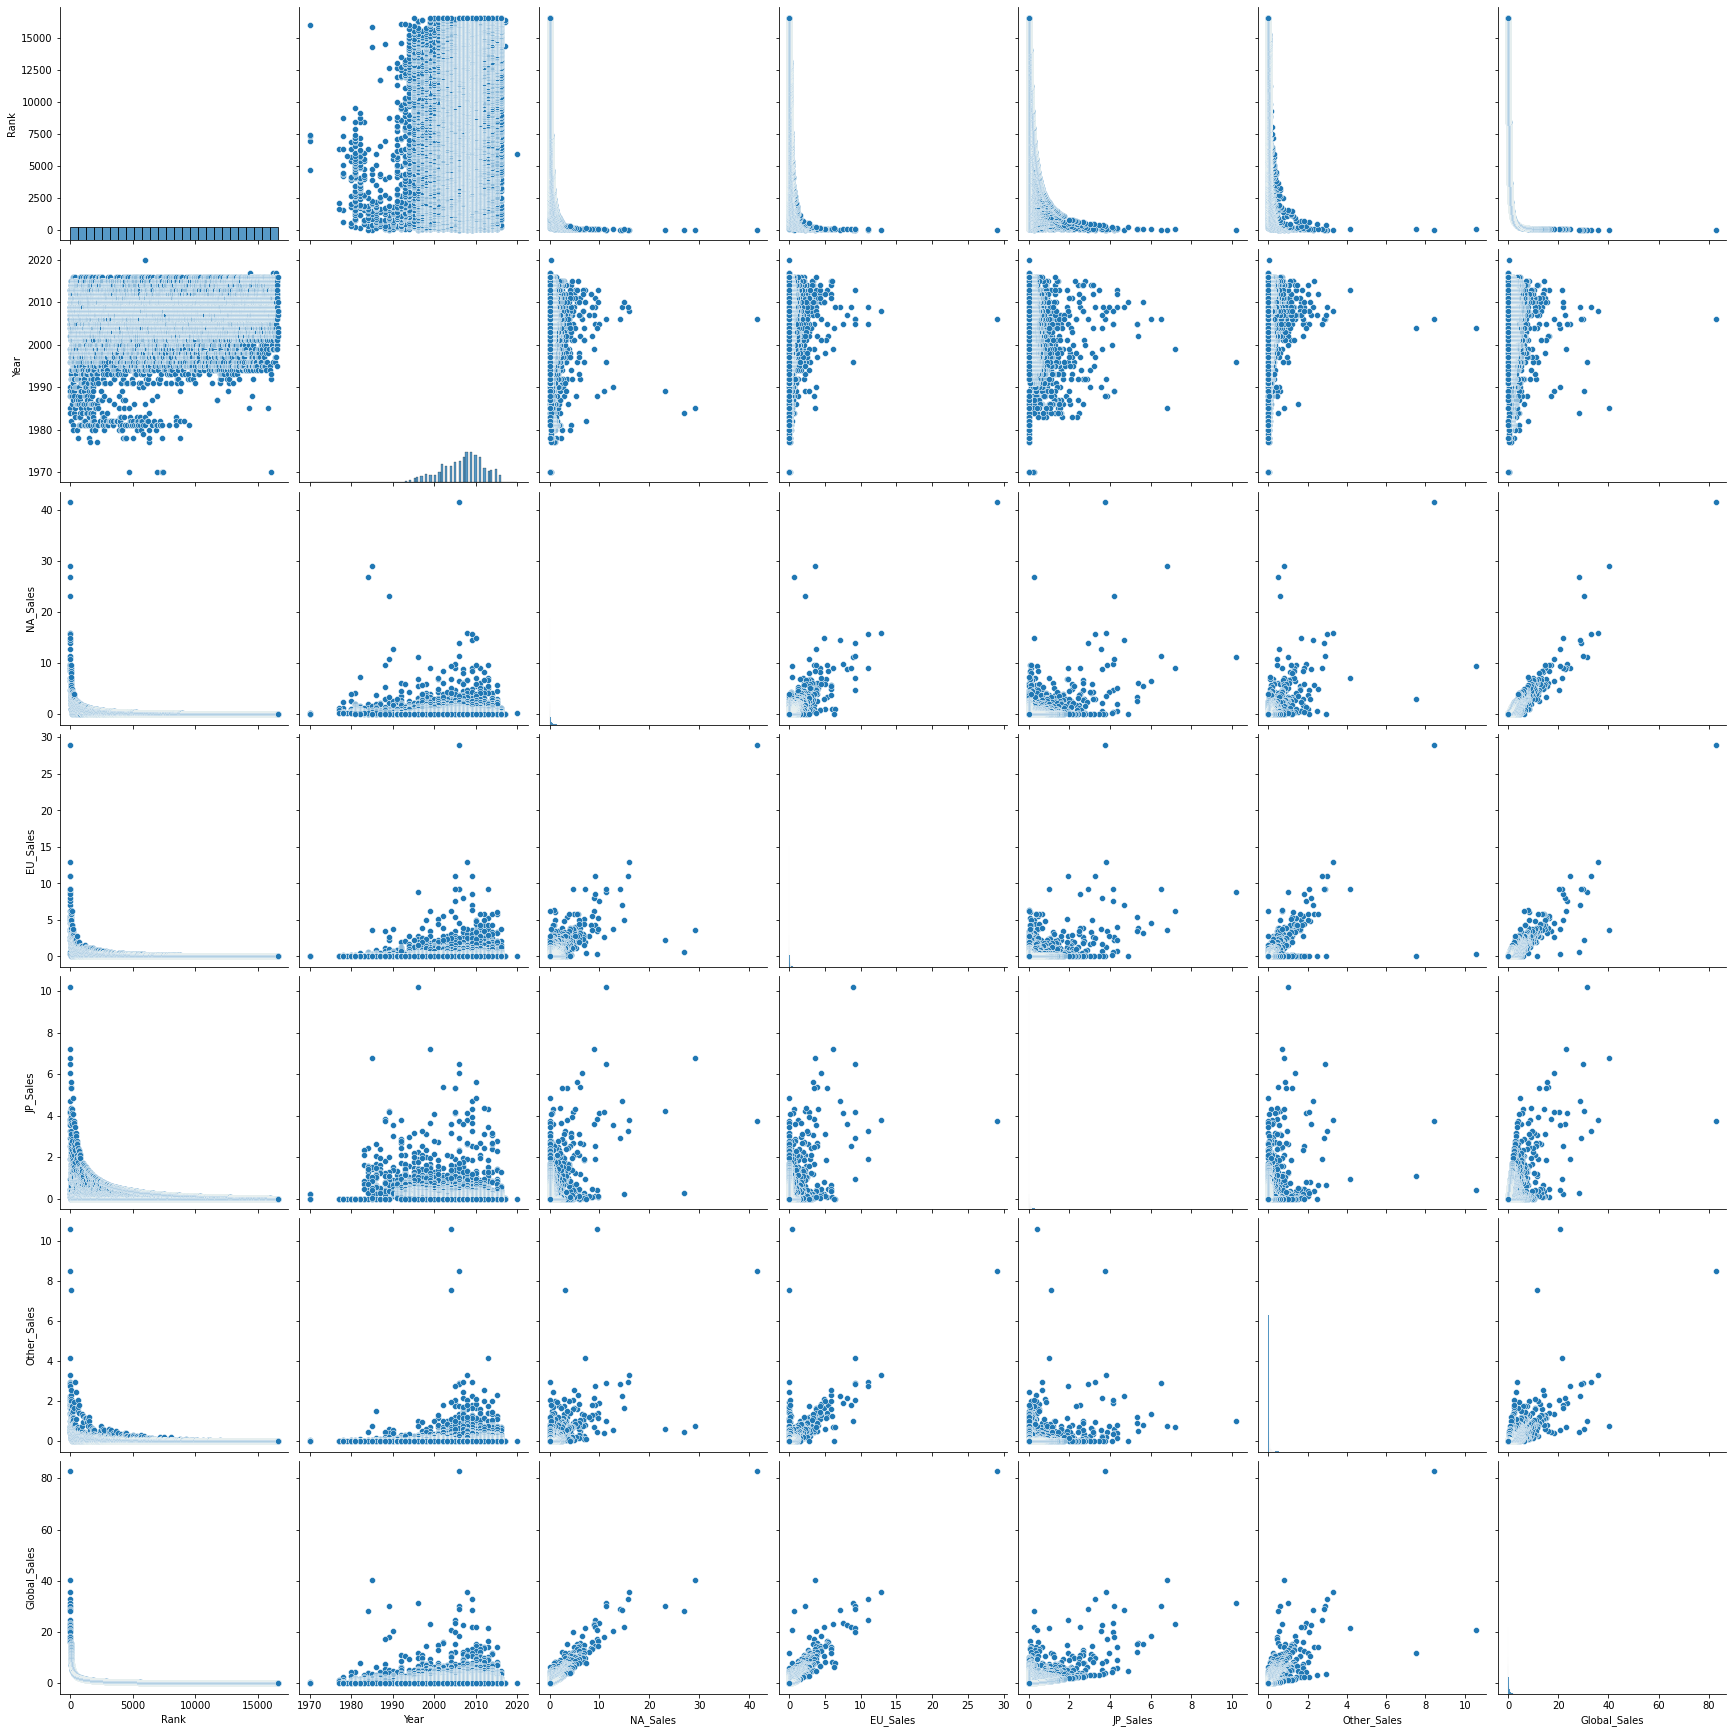

In [63]:
sns.pairplot(df, height=3.5);
plt.show()

# visualization - categorical data

In [65]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


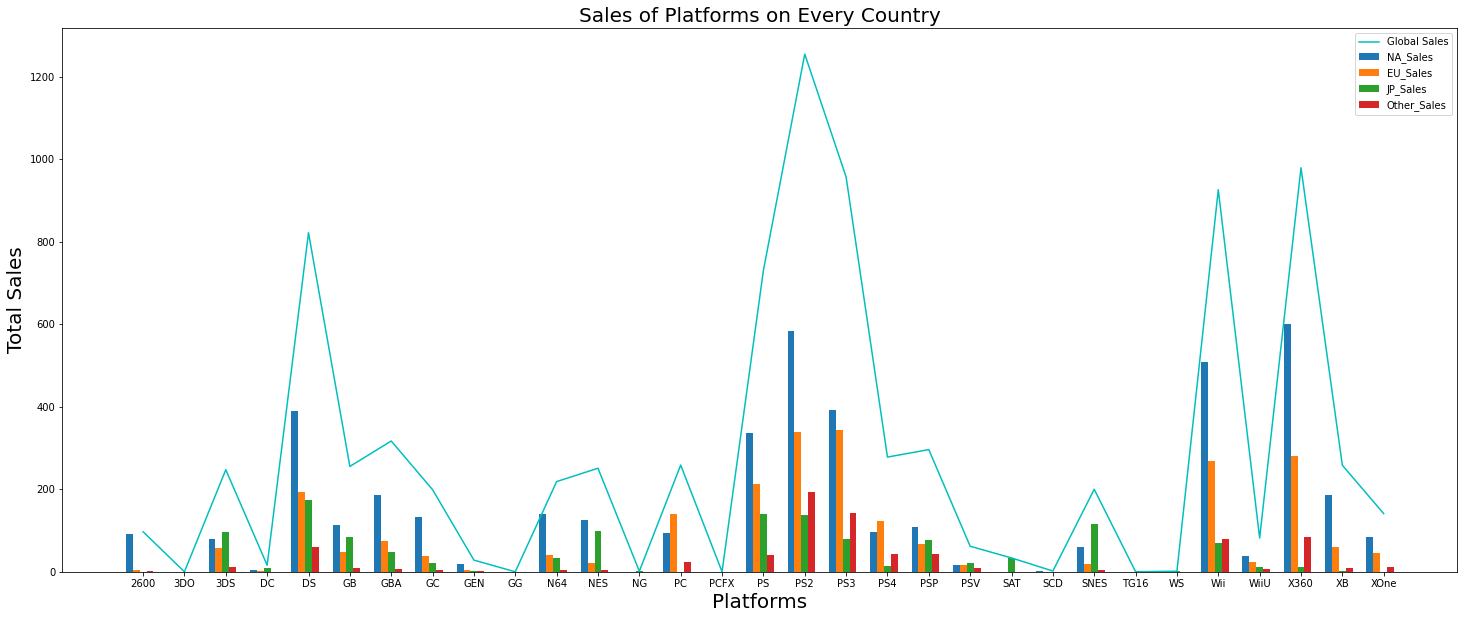

In [156]:
df_plt = df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
df_plt.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(25, 10))

w=.5
k=w*6
x = np.arange(0, df_plt['Platform'].count()*k, k)

ax.bar(x-2*w, df_plt['NA_Sales'], w, label='NA_Sales')
ax.bar(x-1*w, df_plt['EU_Sales'], w, label='EU_Sales')
ax.bar(x-0*w, df_plt['JP_Sales'], w, label='JP_Sales')
ax.bar(x+1*w, df_plt['Other_Sales'], w, label='Other_Sales')
ax.plot(x, df_plt['Global_Sales'], label='Global Sales', c='c')

plt.xticks(x)

ax.set_xticklabels(df_plt['Platform'])
ax.legend()

plt.xlabel("Platforms", fontdict={'fontsize':20})
plt.ylabel("Total Sales", fontdict={'fontsize':20})
plt.title("Sales of Platforms on Every Country", fontdict={'fontsize':20})

plt.show()

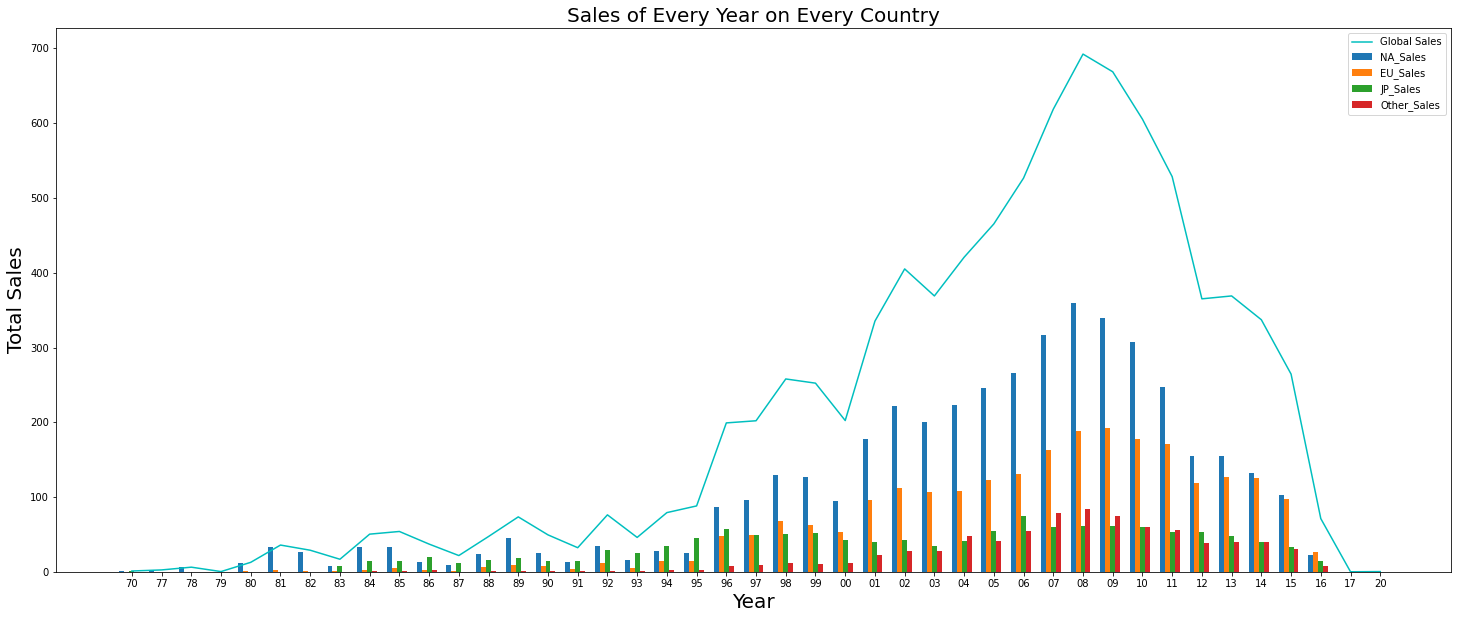

In [157]:
df_plt = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
df_plt.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(25, 10))

w=.5
k=w*6
x = np.arange(0, df_plt['Year'].count()*k, k)

ax.bar(x-2*w, df_plt['NA_Sales'], w, label='NA_Sales')
ax.bar(x-1*w, df_plt['EU_Sales'], w, label='EU_Sales')
ax.bar(x-0*w, df_plt['JP_Sales'], w, label='JP_Sales')
ax.bar(x+1*w, df_plt['Other_Sales'], w, label='Other_Sales')
ax.plot(x, df_plt['Global_Sales'], label='Global Sales', c='c')

plt.xticks(x)

ax.set_xticklabels(df_plt['Year'].astype(str).str[2:4])
ax.legend()

plt.xlabel("Year", fontdict={'fontsize':20})
plt.ylabel("Total Sales", fontdict={'fontsize':20})
plt.title("Sales of Every Year on Every Country", fontdict={'fontsize':20})

plt.show()

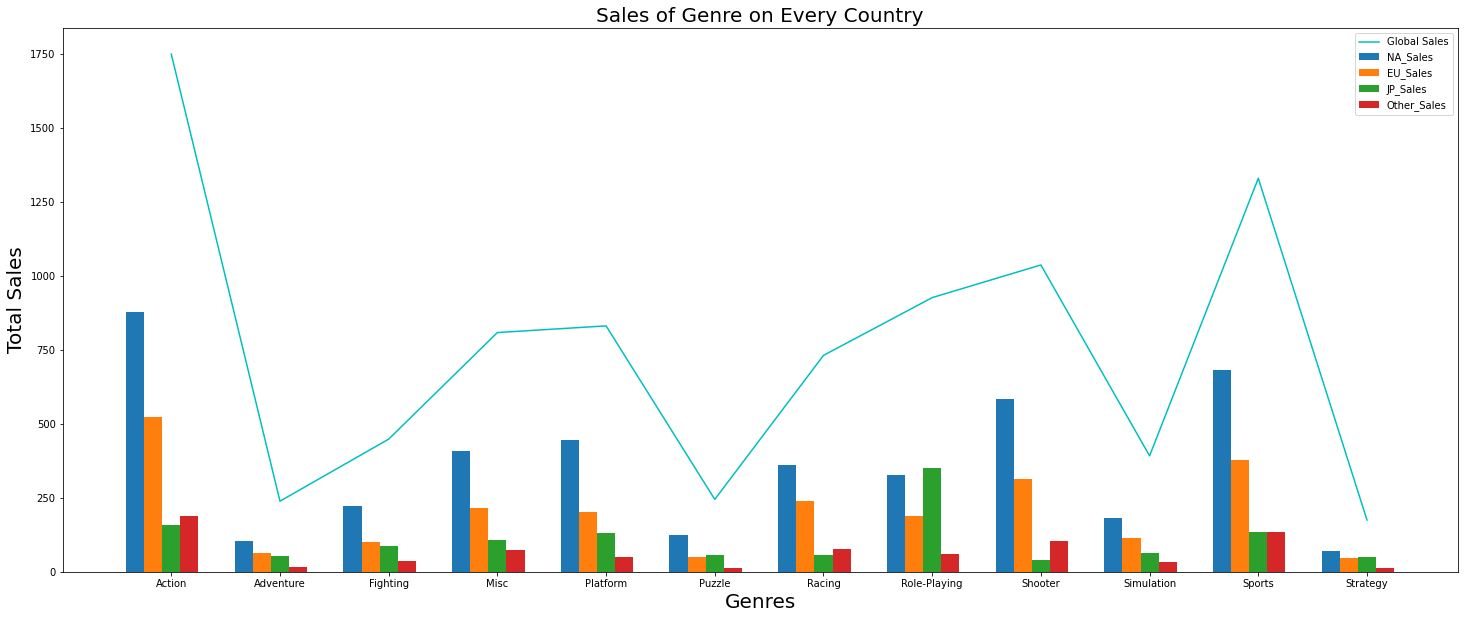

In [158]:
df_plt = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
df_plt.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(25, 10))

w=.5
k=w*6
x = np.arange(0, df_plt['Genre'].count()*k, k)

ax.bar(x-2*w, df_plt['NA_Sales'], w, label='NA_Sales')
ax.bar(x-1*w, df_plt['EU_Sales'], w, label='EU_Sales')
ax.bar(x-0*w, df_plt['JP_Sales'], w, label='JP_Sales')
ax.bar(x+1*w, df_plt['Other_Sales'], w, label='Other_Sales')
ax.plot(x, df_plt['Global_Sales'], label='Global Sales', c='c')

plt.xticks(x)

#ax.set_xticks(x)

ax.set_xticklabels(df_plt['Genre'])
ax.legend()

plt.xlabel("Genres", fontdict={'fontsize':20})
plt.ylabel("Total Sales", fontdict={'fontsize':20})
plt.title("Sales of Genre on Every Country", fontdict={'fontsize':20})

plt.show()

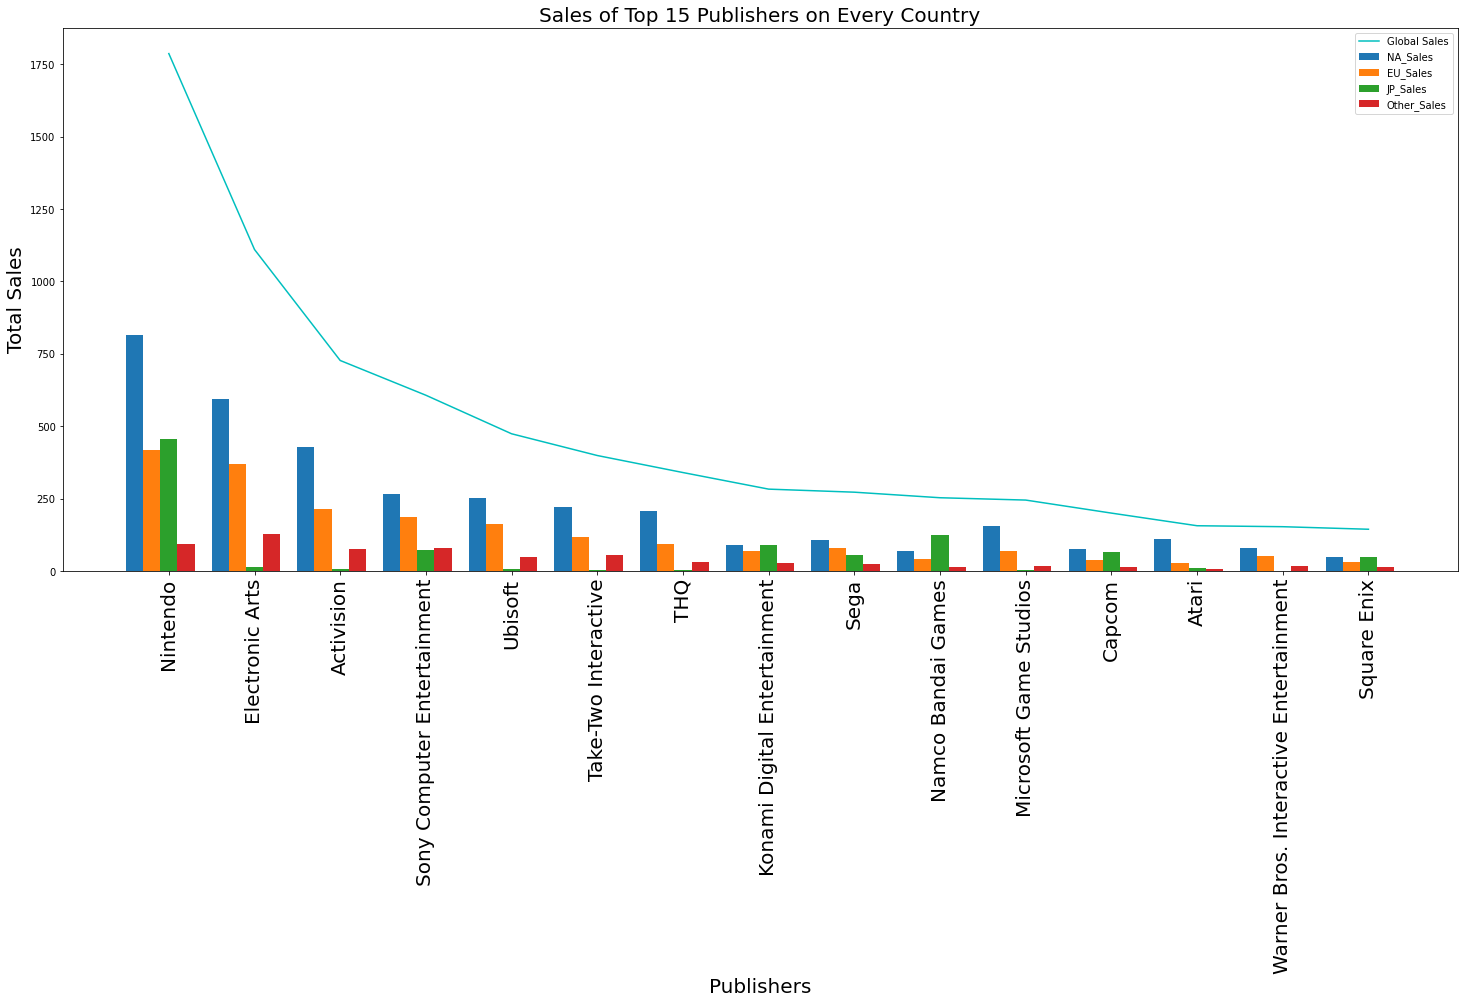

In [170]:
df_plt = df.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
df_plt.reset_index(inplace=True)
df_plt = df_plt.sort_values(by=['Global_Sales'], ascending=False)[:15]
fig, ax = plt.subplots(figsize=(25, 10))

w=.5
k=w*5
x = np.arange(0, df_plt['Publisher'].count()*k, k)

ax.bar(x-2*w, df_plt['NA_Sales'], w, label='NA_Sales')
ax.bar(x-1*w, df_plt['EU_Sales'], w, label='EU_Sales')
ax.bar(x-0*w, df_plt['JP_Sales'], w, label='JP_Sales')
ax.bar(x+1*w, df_plt['Other_Sales'], w, label='Other_Sales')
ax.plot(x, df_plt['Global_Sales'], label='Global Sales', c='c')

plt.xticks(x, rotation=90)

#ax.set_xticks(x)

ax.set_xticklabels(df_plt['Publisher'], fontdict={'fontsize':20})
ax.legend()

plt.xlabel("Publishers", fontdict={'fontsize':20})
plt.ylabel("Total Sales", fontdict={'fontsize':20})
plt.title("Sales of Top 15 Publishers on Every Country", fontdict={'fontsize':20})

plt.show()